In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore



In [2]:
df = pd.read_csv('goodreads.csv')


In [3]:
#df = df.drop(columns=['id'] , axis=1)
df = df.drop('Unnamed: 0', axis=1)


In [4]:
df.head()

,title,author,rating_count,review_count,average_rating,number_of_pages,publisher,characters
0,A Time to Embrace,Karen Kingsbury,4179,177,4.35,400.0,Thomas Nelson,NaN
1,Reliquary,"Douglas Preston, Lincoln Child",38382,1424,4.01,464.0,Tor Books,"Aloysius X.L. Pendergast, Margo Green, William..."
2,The Millionaire Next Door: The Surprising Secr...,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,258.0,Gallery Books,NaN
3,Black Sheep,Georgette Heyer,9538,775,4.05,252.0,Arrow,"Abigail Wendover, Miles Calverleigh"
4,Sylvester,"Georgette Heyer, Joan Wolf",13473,1141,4.11,410.0,Harlequin,"Phoebe Marlow, Sylvester, Duke of Salford"


As we can see, I have NaN values in my data, and I handled this situation by deleting them. Also I deleted duplicates if excisted.

In [5]:
df = df.dropna()
df = df.drop_duplicates()
df.shape[0]

5590

As we can see - after the cleaning, the dataframe has 5590 rows.


Outliers are data points that fall significantly outside the range of the majority of the other data points. They can be extreme values that deviate from the overall pattern and may require special attention in data analysis and modeling.

In [6]:
z_scores = zscore(df['review_count'])
threshold = 3
df = df[(z_scores < threshold)]
z_scores = zscore(df['number_of_pages'])
threshold = 3
df = df[(z_scores < threshold)]
z_scores = zscore(df['rating_count'])
threshold = 3
df = df[(z_scores < threshold)]


The most common threshold value is 3. Any value greater than 3 will be deleted so that we can create a reliable dataframe.

The Describe function shows the statistics about the data so we can observe if there is something to handle.  

In [7]:
df.describe()

,rating_count,review_count,average_rating,number_of_pages
count,5295.000000,5295.000000,5295.000000,5295.000000
mean,33548.135222,1427.478565,3.977645,349.858735
std,49812.475495,2096.696440,0.231157,161.704275
min,8.000000,0.000000,2.500000,0.000000
25%,5846.000000,264.000000,3.840000,240.000000
50%,14517.000000,662.000000,3.980000,336.000000
75%,37191.000000,1640.500000,4.140000,426.000000
max,320065.000000,20283.000000,4.760000,1006.000000


The table shows us that the MAX rating count and the mean are too high, which affects the number of pages column. Getting more reliable results is the next step. 

A book with 20000 ratings counts, for example, could corrupt our reliability, so it needs to be removed.

Since rating count and number of books are integers, I needed to convert them to ints.

In [8]:
df['number_of_pages'] = df['number_of_pages'].astype(int)
df['rating_count'] = df['rating_count'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 1 to 14608
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5295 non-null   object 
 1   author           5295 non-null   object 
 2   rating_count     5295 non-null   int32  
 3   review_count     5295 non-null   int64  
 4   average_rating   5295 non-null   float64
 5   number_of_pages  5295 non-null   int32  
 6   publisher        5295 non-null   object 
 7   characters       5295 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 330.9+ KB


In [10]:
df['rating_count'].value_counts()

677      3
2298     3
5921     3
860      3
3162     3
        ..
17694    1
20053    1
27903    1
5678     1
82013    1
Name: rating_count, Length: 4993, dtype: int64

As we can see, the rating count is not balanced.
Before the cleaning, the most popluar rating is 677 ,2298 and 5921.

In [11]:
df['rating_count'].mean()

33548.13522190746

Before the cleaning, the mean is 33548.13522190746.


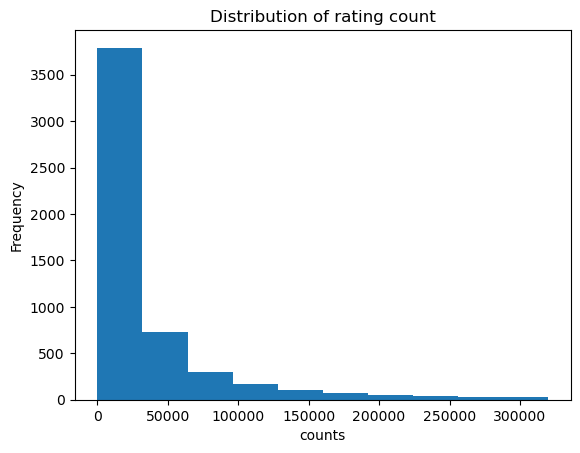

In [12]:
plt.hist(df['rating_count'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('counts')
plt.ylabel('Frequency')
plt.title('Distribution of rating count')
plt.show()

In [13]:
df = df[df['rating_count'] < 60000]

condition = (df['rating_count'].between(0, 10000))
df.loc[condition, 'rating_count'] = df.loc[condition, 'rating_count'].head(1200)

I cleared all the books with a rating count of more than 60000. I wanted to show the first 1200 different books that their rating count is between 0 to 10000. As we can see from the graph The frequency decreased as the counts decreased.

In [14]:
df = df.dropna()

The rating count was not balanced and had 4600 counts. Instead of deleting the row, it showed Null objects, so I cleared all the lines.

In [15]:
unique_authors = df['author'].value_counts()
print(unique_authors)


Nora Roberts                             47
Agatha Christie                          44
Meg Cabot                                24
Mercedes Lackey                          21
Anne McCaffrey                           20
                                         ..
Michael Ondaatje                          1
Jason Goodwin                             1
David Nasaw                               1
Margaret MacMillan, Richard Holbrooke     1
Deeanne Gist                              1
Name: author, Length: 1933, dtype: int64


We can see that we have 2797 authors at all. The most popular are: Nora Roberts, Agatha Christie and Terry Pratchett.

In [16]:
df.describe()

,rating_count,review_count,average_rating,number_of_pages
count,3570.000000,3570.000000,3570.000000,3570.000000
mean,18548.678151,897.020448,3.975473,345.018487
std,14789.921513,871.340299,0.232914,157.809795
min,10.000000,4.000000,2.500000,0.000000
25%,6591.750000,284.000000,3.830000,240.000000
50%,14739.000000,640.500000,3.980000,334.000000
75%,26810.750000,1238.750000,4.140000,418.000000
max,59922.000000,7083.000000,4.760000,990.000000


The statictics looks good, but we need to take care of the Maximal row. 
In addition, we can see that the average rating is not balanced, because the average is from 1 to 5, and there are no books with rating 1 or 2 (its start's from 2.5).
secondly, we need to clean all the books with 0 pages.


In [17]:
df = df[df['number_of_pages'] != 0]
df = df[df['number_of_pages'] <= 600]
df = df[df['number_of_pages']>=50]

Let's see what conclusions we can make of the Number Of Pages graph.

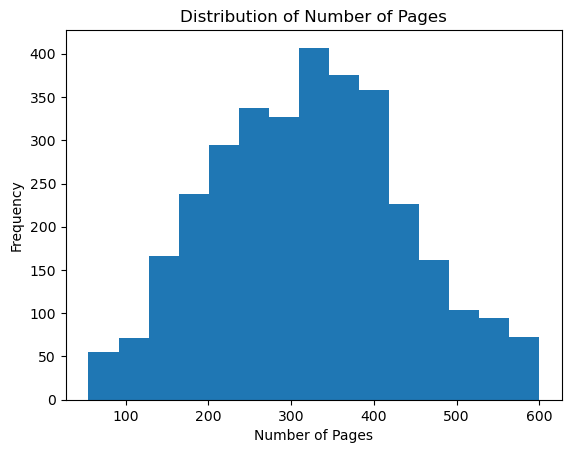

In [18]:
plt.hist(df['number_of_pages'], bins=15) 
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Pages')
plt.show()

The conclusion from the graph is that most books has between 300 to 400 pages.

Now, Let's see what we can conclude from the average rating graph.

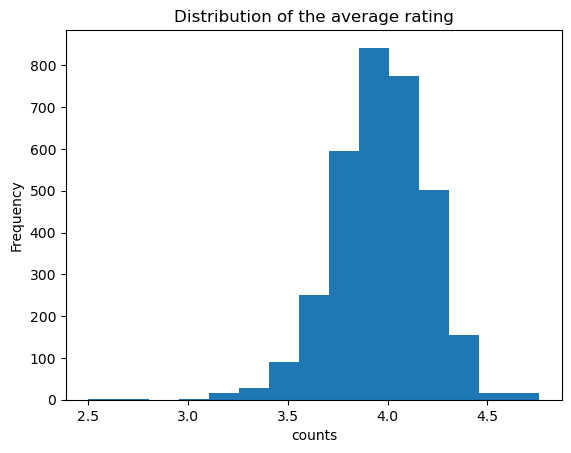

In [19]:
plt.hist(df['average_rating'], bins=15)  
plt.xlabel('counts')
plt.ylabel('Frequency')
plt.title('Distribution of the average rating')
plt.show()



Now I want to balance the average rating between 3.8 to 4 counts:

In [20]:
condition = (df['average_rating'].between(3.8,4.0))
df.loc[condition, 'average_rating'] = df.loc[condition, 'average_rating'].head(1000)

I tried to gather a sample of 1000 books with average rating between 3.8 to 4.0 so I can balance the dataframe.

Using the following command I wanted to round the number with one digit after the decimal point.

In [21]:
df['average_rating'] = df['average_rating'].round(1)

In [22]:
df = df.dropna()

With df.dropna() function I want to delete all the rows with Nan values.

Let's see the data information after all changes.

In [23]:
df.describe()

,rating_count,review_count,average_rating,number_of_pages
count,3142.000000,3142.000000,3142.00000,3142.000000
mean,18270.077339,891.689370,3.97021,321.576703
std,14760.927756,886.470745,0.23861,115.919011
min,10.000000,4.000000,2.50000,55.000000
25%,6376.750000,275.000000,3.80000,234.000000
50%,14421.500000,620.000000,4.00000,320.000000
75%,26431.500000,1216.000000,4.10000,400.000000
max,59732.000000,7083.000000,4.80000,600.000000


In [24]:
df['average_rating'].value_counts()

4.0    558
4.1    477
3.8    452
4.2    441
3.9    421
3.7    235
4.3    177
3.6    132
4.4     87
3.5     57
3.4     42
3.2     13
4.5     12
4.7     11
3.3     11
4.6      6
3.1      4
4.8      2
3.0      1
2.6      1
2.5      1
2.8      1
Name: average_rating, dtype: int64

After cleaning and rounding the data, the most popular average ratings are 4.0 , 4,1 and 3.8.

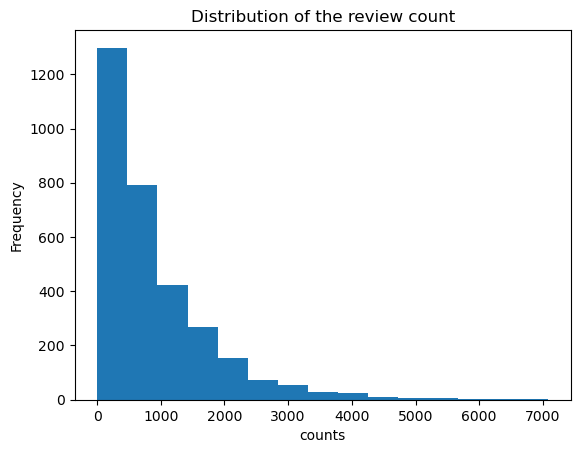

In [25]:
plt.hist(df['review_count'], bins=15)  
plt.xlabel('counts')
plt.ylabel('Frequency')
plt.title('Distribution of the review count')
plt.show()


Correlation is a statistical measure that quantifies the relationship or association between two variables. It indicates the strength and direction of the linear relationship between the variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

In [26]:
(df.corr())

,rating_count,review_count,average_rating,number_of_pages
rating_count,1.000000,0.737994,0.129702,0.054176
review_count,0.737994,1.000000,-0.064088,0.000369
average_rating,0.129702,-0.064088,1.000000,0.102226
number_of_pages,0.054176,0.000369,0.102226,1.000000


Conclusions From the DataFrame:

- First of all, there is hard correlaction between Review Count and Rating count (The positive correlation). As more as people rate books - the number of the reviews is increasing, which is rational.


- We can see that there is negative correlation betweeen 2 variables - Average Rating and Review Count. This means that as one variable increases, the other variable tends to decrease.


- The correlation between Review Count and Number of pages is close to 0.  This means that there is no significant connection between the 2 variables.







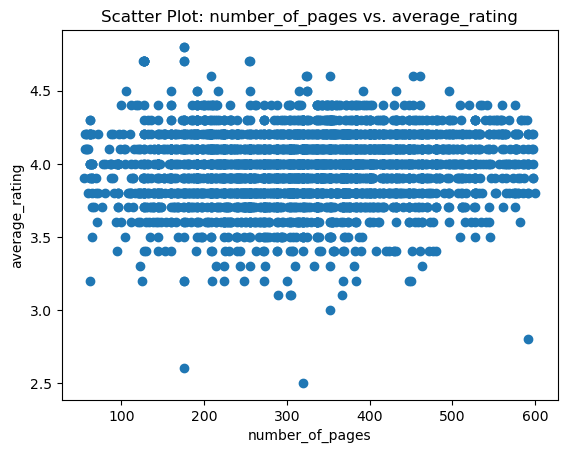

In [27]:
plt.scatter(df['number_of_pages'], df['average_rating'])
plt.xlabel('number_of_pages')
plt.ylabel('average_rating')
plt.title('Scatter Plot: number_of_pages vs. average_rating')
plt.show()

The Scatter Plot describes the connection between Average Rating and Number Of Pages.

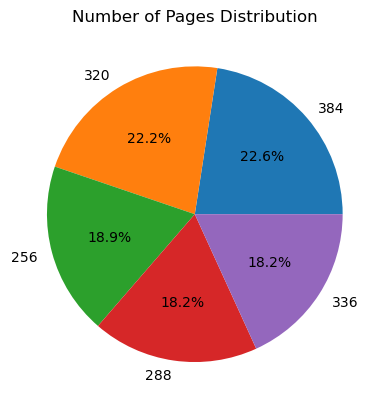

In [28]:
page_counts = df['number_of_pages'].value_counts().head(5)
percentages = page_counts / len(df) * 100

plt.pie(percentages, labels=page_counts.index, autopct='%1.1f%%')
plt.title('Number of Pages Distribution')
plt.show()

The pie chart above describes the top 5 distribution of the data, regarding number of pages in the data set.

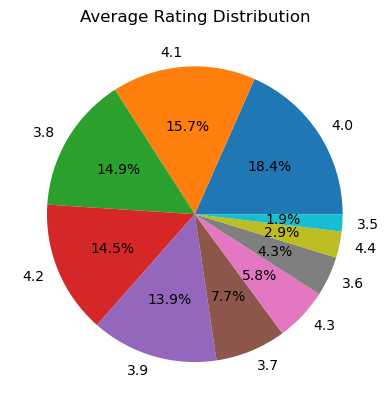

In [29]:
counts = df['average_rating'].value_counts().head(10)
percentages = counts / len(df) * 100

plt.pie(percentages, labels=counts.index, autopct='%1.1f%%')
plt.title('Average Rating Distribution')
plt.show()

    Conclusion from the Pie Chart:

* The most popular rating of books is 4.1 with 15.7%, while the least popular rating is 3.5 with 1.9%.

* Almost 40% percent of the ratings is around 4.

In [30]:
df.shape[0]

3142

The number of rows in the DataFrame after cleaning is 3142.

Extract the data Frame to a CSV file, to use later in the ML: 

In [31]:
df.to_csv('GoodReadsfile3.csv')